In [2]:
#In this model we are going to analyse the IPL Auction of 2020 
#First import the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Using pandas to read the file
#You would have to download the dataset
file = "IPL data.csv"
df = pd.read_csv(file)

In [4]:
#Show the first 5 rows
df.head()

,S.No,Set No,Set,Name,Country,Playing Role,IPL Matches,Capped / Uncapped /Associate,Reserve Price(in ₹ Lacs),IPL 2020 Team,Auctioned Price(in ₹ Lacs),IPL 2019 Team,IPL Team(s)
0,1,1,BA1,Chris Lynn,NaN,Batsman,41.0,Capped,200,Mumbai Indians,200,KKR,"Deccan Chargers,SRH,KKR"
1,2,1,BA1,Eoin Morgan,NaN,Batsman,52.0,Capped,200,Kolkata Knight Riders,525,NaN,"RCB, KKR, SRH, KXIP"
2,3,1,BA1,Robin Uthappa,NaN,Batsman,177.0,Capped,150,Rajasthan Royals,300,KKR,"MI, RCB, PWI, KKR"
3,4,1,BA1,Jason Roy,NaN,Batsman,8.0,Capped,150,Delhi Capitals,150,NaN,"GL,DD"
4,5,1,BA1,Aaron Finch,NaN,Batsman,75.0,Capped,100,Royal Challengers Bangalore,440,NaN,"RR, DD, PWI, SRH, MI, GL, KXIP"


In [5]:
#A line to display the matplotlib in the notebook itself
%matplotlib inline
plt.rcParams['figure.figsize']=20,10

In [6]:
#Calculating the difference between auctioned and reserved price
a = df['Auctioned Price(in ₹ Lacs)'] - df['Reserve Price(in ₹ Lacs)']
av = a.value_counts()
av

0       36
170      2
220      1
450      1
325      1
1350     1
200      1
10       1
380      1
850      1
340      1
725      1
150      1
575      1
190      1
800      1
225      1
60       1
40       1
875      1
110      1
370      1
180      1
250      1
700      1
35       1
dtype: int64

Text(0.5, 1.0, 'Difference b/w Auctioned & Reserve Price vs number of players')

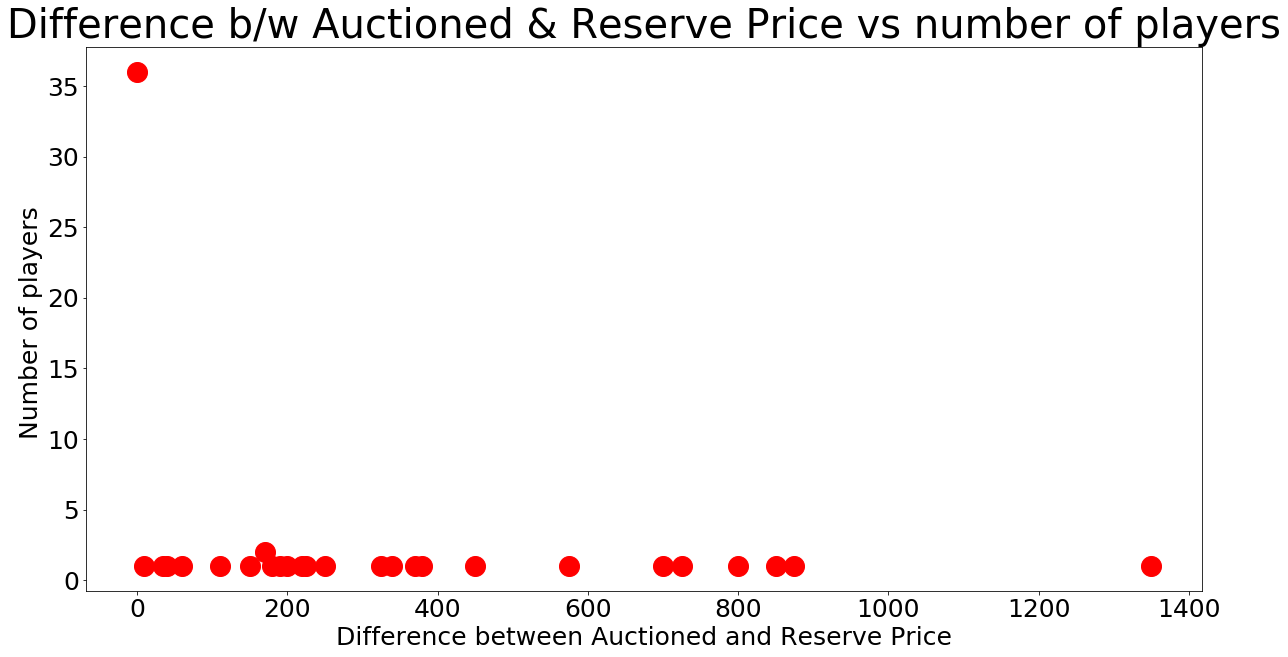

In [7]:
#Pretty insightful
#Let's plot it
#To plot it
plt.plot(av,c ='Red' , ls='', marker = 'o', ms=20)
#c - colour
# ls - line style
# marker - marker type
#ms - marker size

#The x-axis marks(ticks) - (0,200,400,600)
plt.xticks(fontsize = 25)
#The y-axis marks(ticks) - (0,5,10,15,20,25)
plt.yticks(fontsize = 25)
#The label of the y-axis
plt.ylabel("Number of players ",fontsize = 25)
#The label of the x-axis
plt.xlabel("Difference between Auctioned and Reserve Price",fontsize = 25)
#The title of the plot
plt.title("Difference b/w Auctioned & Reserve Price vs number of players",fontsize = 40)
#We will follow a similiar approcah for all the other plots

Text(0.5, 1.0, 'Number of players sold and number of matches played')

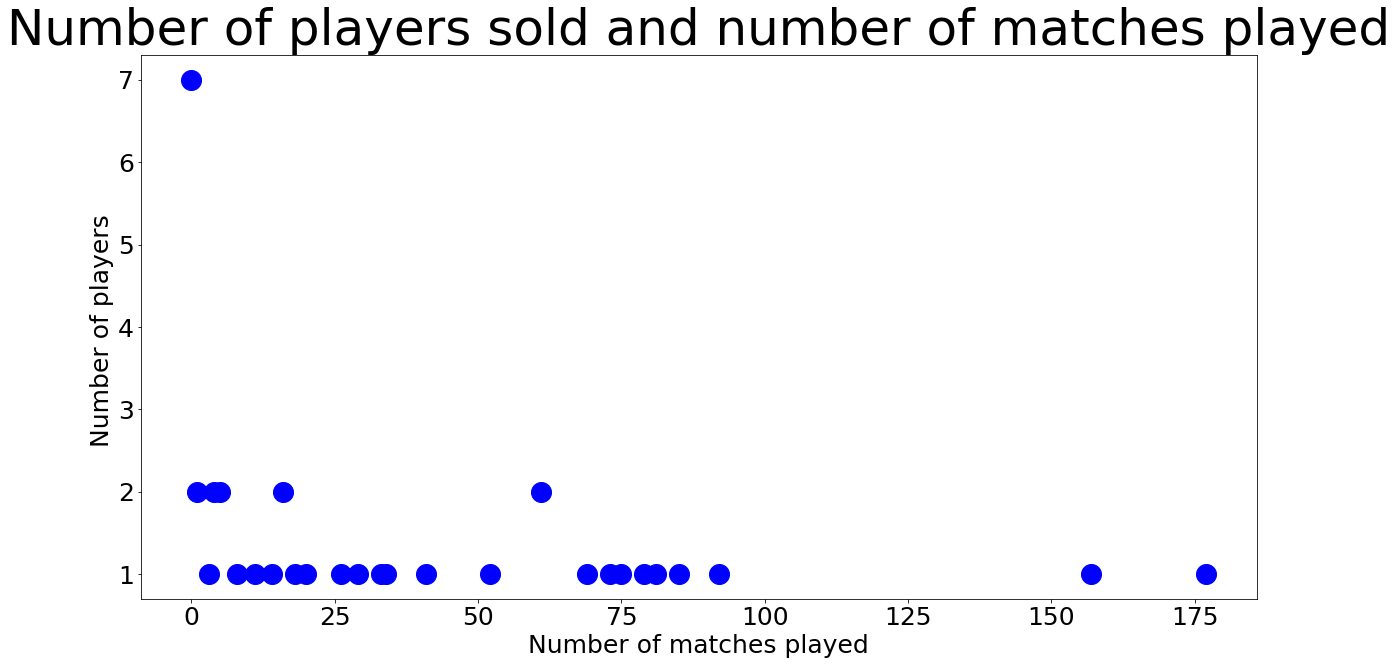

In [8]:
#Finding the correlation between number of matches played and number of players sold
c = df['IPL Matches'].value_counts()
plt.plot(c,c ='Blue' , ls='', marker = 'o', ms=20)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel("Number of players ",fontsize = 25)
plt.xlabel("Number of matches played",fontsize = 25)
plt.title("Number of players sold and number of matches played",fontsize = 50)

Rajasthan Royals               11
Kolkata Knight Riders           9
Kings XI Punjab                 9
Delhi Capitals                  8
Royal Challengers Bangalore     8
Sunrisers Hyderabad             7
Mumbai Indians                  6
Chennai Super Kings             4
Name: IPL 2020 Team, dtype: int64


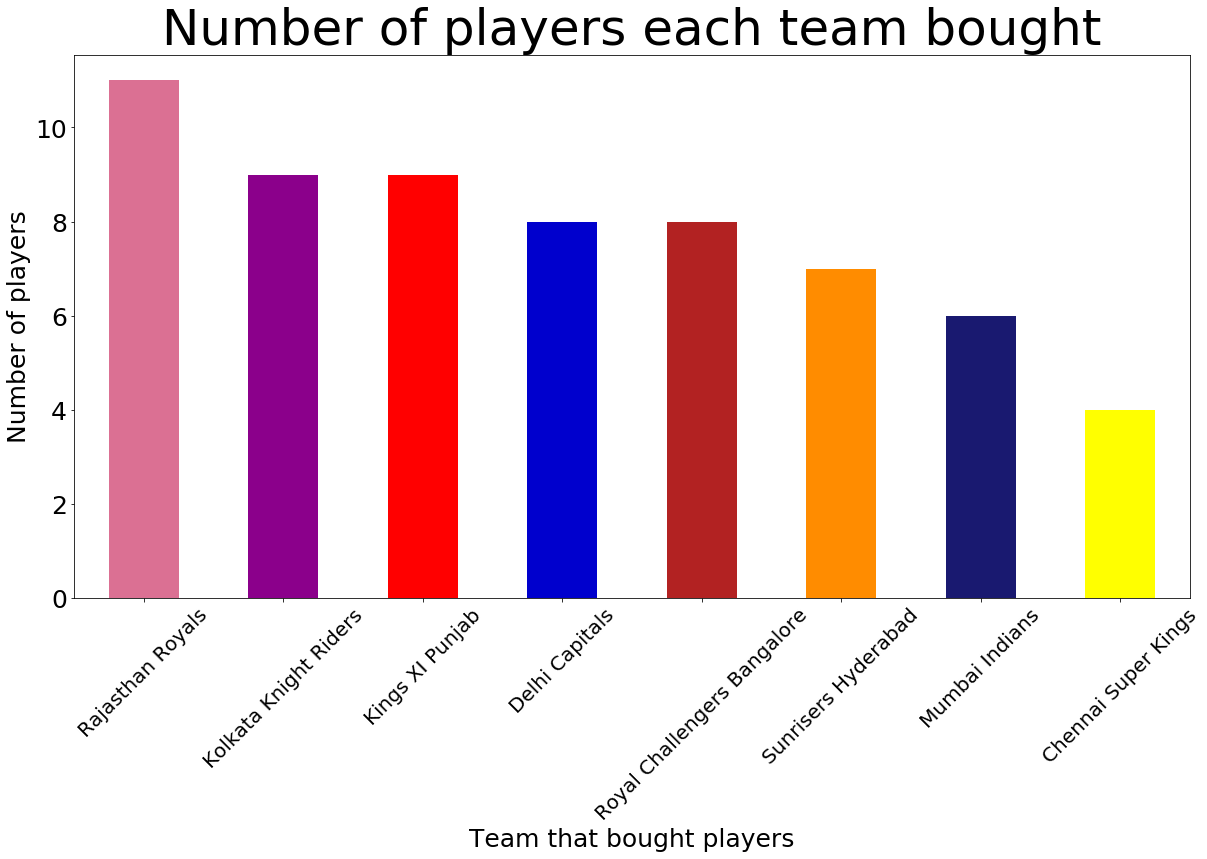

In [38]:
#Finding how many number of players each team bought
d = df['IPL 2020 Team']
dv = df['IPL 2020 Team'].value_counts()
print(dv)
dv.plot(kind = 'bar',color = ['palevioletred','darkmagenta','red','mediumblue','firebrick','darkorange','midnightblue','yellow'])
plt.xticks(fontsize = 20,rotation = 45)
plt.yticks(fontsize = 25)
plt.xlabel("Team that bought players",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players each team bought",fontsize = 50)
plt.show()

KXIP    4
KKR     4
RCB     4
RR      3
DC      1
SRH     1
Name: IPL 2019 Team, dtype: int64


Text(0.5, 1.0, 'Number of players each team sold')

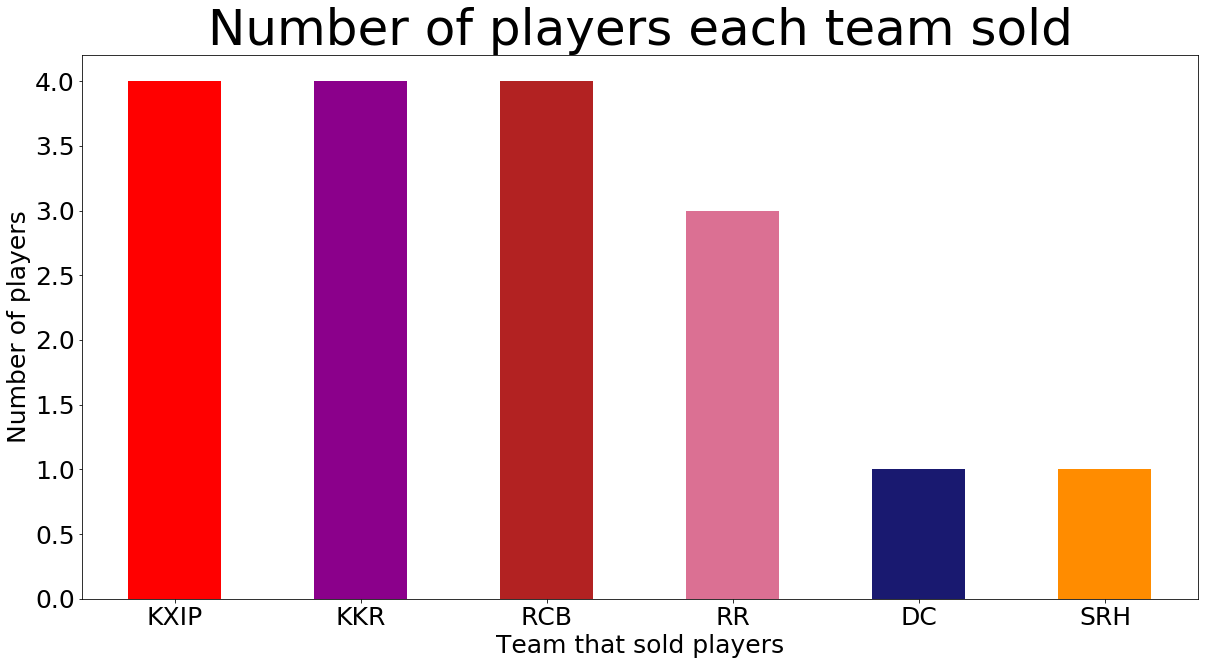

In [47]:
#Finding how many number of players each team sold
e = df['IPL 2019 Team'].value_counts()
print(e)
e.plot(kind = 'bar',color = ['red','darkmagenta','firebrick','palevioletred','midnightblue','darkorange'])
plt.show
plt.xticks(fontsize = 25,rotation = 0)
plt.yticks(fontsize = 25)
plt.xlabel("Team that sold players",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players each team sold",fontsize = 50)

Capped      32
Uncapped    30
Name: Capped / Uncapped /Associate, dtype: int64


Text(0.5, 1.0, 'Number of players capped and uncapped')

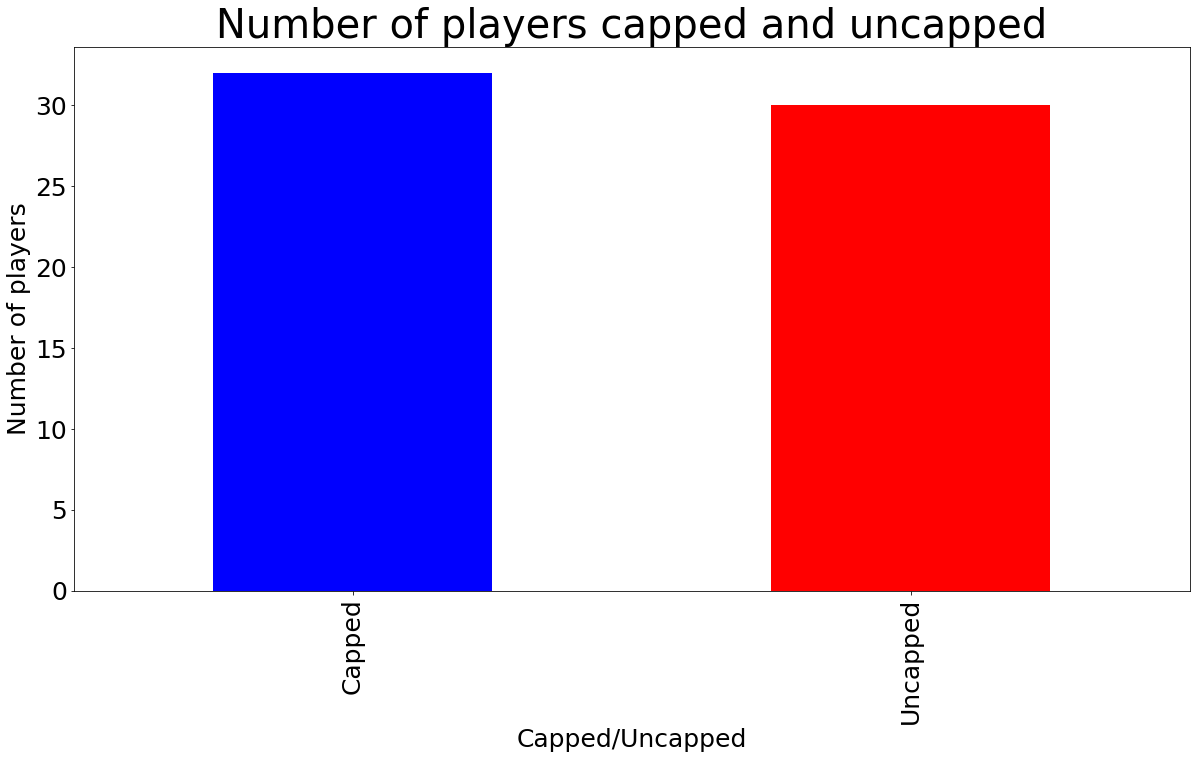

In [45]:
#Findind the correlation between number of players sold and capped/uncapped players
f = df['Capped / Uncapped /Associate'].value_counts()
print(f)
f.plot(kind = 'bar',color = ['blue','red'])
plt.show
plt.xticks(fontsize =25)
plt.yticks(fontsize = 25)
plt.xlabel("Capped/Uncapped",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players capped and uncapped",fontsize = 40)

All-Rounder      17
Batsman          12
Fast Bowler       9
All Rounder       8
Bowler            5
Spinner           4
Wicket Keeper     3
Wicket-Keeper     3
All-rounder       1
Name: Playing Role, dtype: int64


Text(0.5, 1.0, 'Number of players in each position')

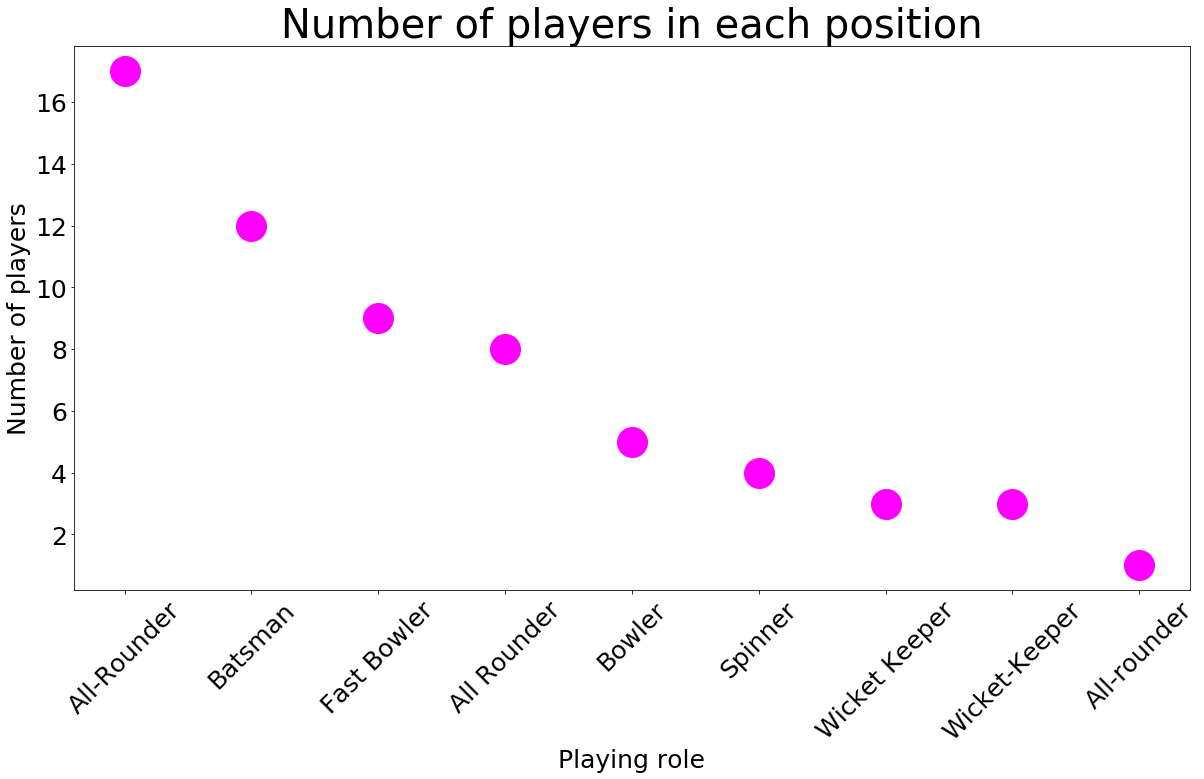

In [29]:
#Finding the correlation between playing role and number of players sold
g = df['Playing Role'].value_counts()
print(g)
plt.plot(g, c ='Magenta' , ls='', marker = 'o', ms=30)
plt.show
plt.xticks(fontsize =25,rotation = 45)
plt.yticks(fontsize = 25)
plt.xlabel("Playing role",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players in each position",fontsize = 40)

20      20
50       7
200      5
300      3
100      3
190      2
150      2
240      2
400      2
775      1
75       1
525      1
1550     1
850      1
800      1
80       1
480      1
60       1
675      1
550      1
1000     1
1075     1
55       1
440      1
130      1
Name: Auctioned Price(in ₹ Lacs), dtype: int64


Text(0.5, 1.0, 'Number of players in per price')

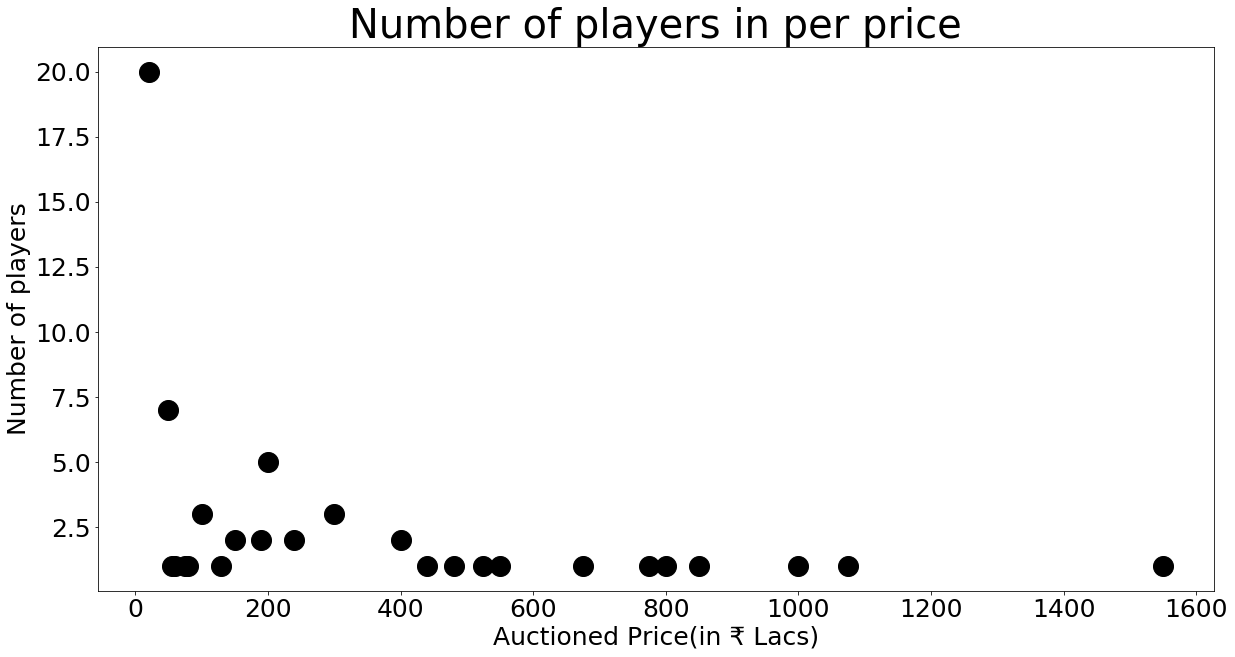

In [30]:
#Finding the correlation between auctioned and number of players sold
h = df['Auctioned Price(in ₹ Lacs)'].value_counts()
print(h)
plt.plot(h, c ='Black' , ls='', marker = 'o', ms=20)
plt.show
plt.xticks(fontsize =25)
plt.yticks(fontsize = 25)
plt.xlabel("Auctioned Price(in ₹ Lacs)",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players in per price",fontsize = 40)

20     28
50      9
100     9
200     7
150     5
75      2
40      1
30      1
Name: Reserve Price(in ₹ Lacs), dtype: int64


Text(0.5, 1.0, 'Number of players in per price')

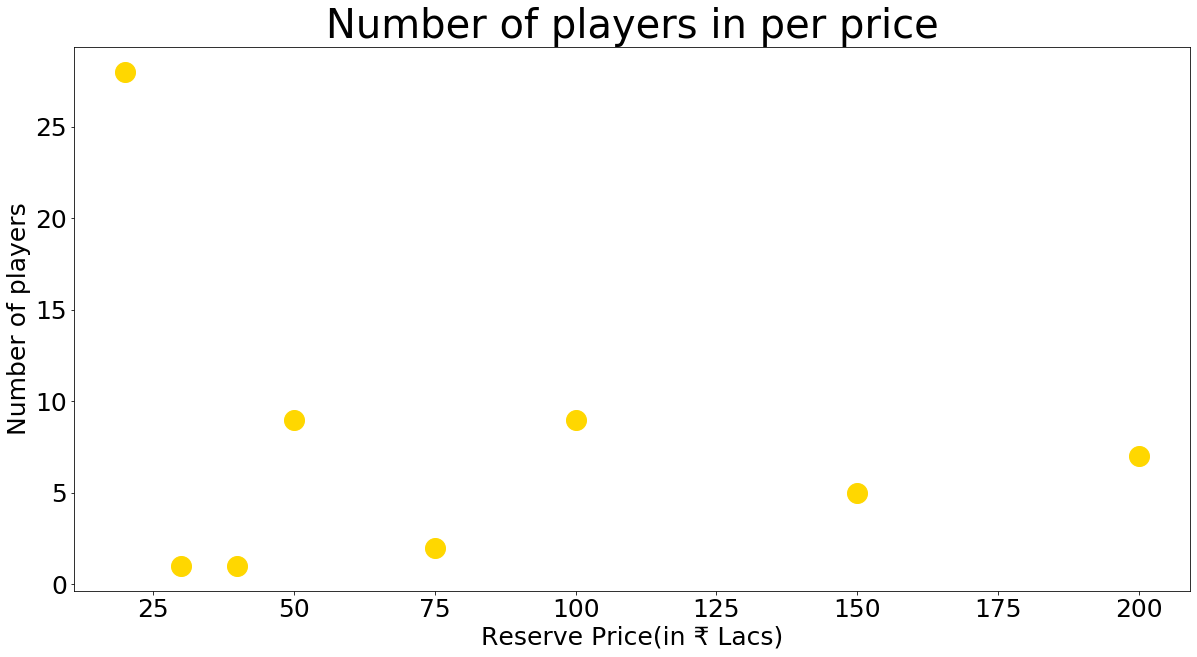

In [31]:
#Finding the correlation between reserved price and number of players sold
i = df['Reserve Price(in ₹ Lacs)'].value_counts()
print(i)
plt.plot(i, c ='Gold' , ls='', marker = 'o', ms=20)
plt.show
plt.xticks(fontsize =25)
plt.yticks(fontsize = 25)
plt.xlabel("Reserve Price(in ₹ Lacs)",fontsize = 25)
plt.ylabel("Number of players",fontsize = 25)
plt.title("Number of players in per price",fontsize = 40)

Thats it
I recommend you to play around with the matplotlib.pyplot functions
